In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
data =  pd.read_json("./data.json")
data.head(1)

index           mac               timestamp  no  rssi  \
0      0  c300000a7a63 2024-10-04 15:45:53.217   0   -52   

                                                 raw  Angle  Distance  \
0  0201061bff3906cafb0114fff9ffe200fd000000000000...     90       200   

   frequency                                                 iq  \
0       2426  [97, -130, 107, 121, -138, 80, -51, -154, 165,...   

                                             samples  \
0  {'ref': [{'imag': -130.0, 'real': 97.0}, {'ima...   

                                         phase_diffs  \
0  {'a2-a1': [-1.7849121686, -1.8669463735, 4.570...   

                                              aoa_no  \
0  {'aoa_12': [135.210728858, 137.9294602569, 132...   

                                           aoa_minus  \
0  {'aoa_32': [79.2926031199, 86.6225060742, 81.1...   

                                            aoa_plus  
0  {'aoa_12': [45.52865571, 48.0921395482, 43.184...

C:\Users\pedro\AppData\Local\Temp\ipykernel_11320\790668681.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  s = data[data["Distance"] == distance][data["Angle"] == angle]


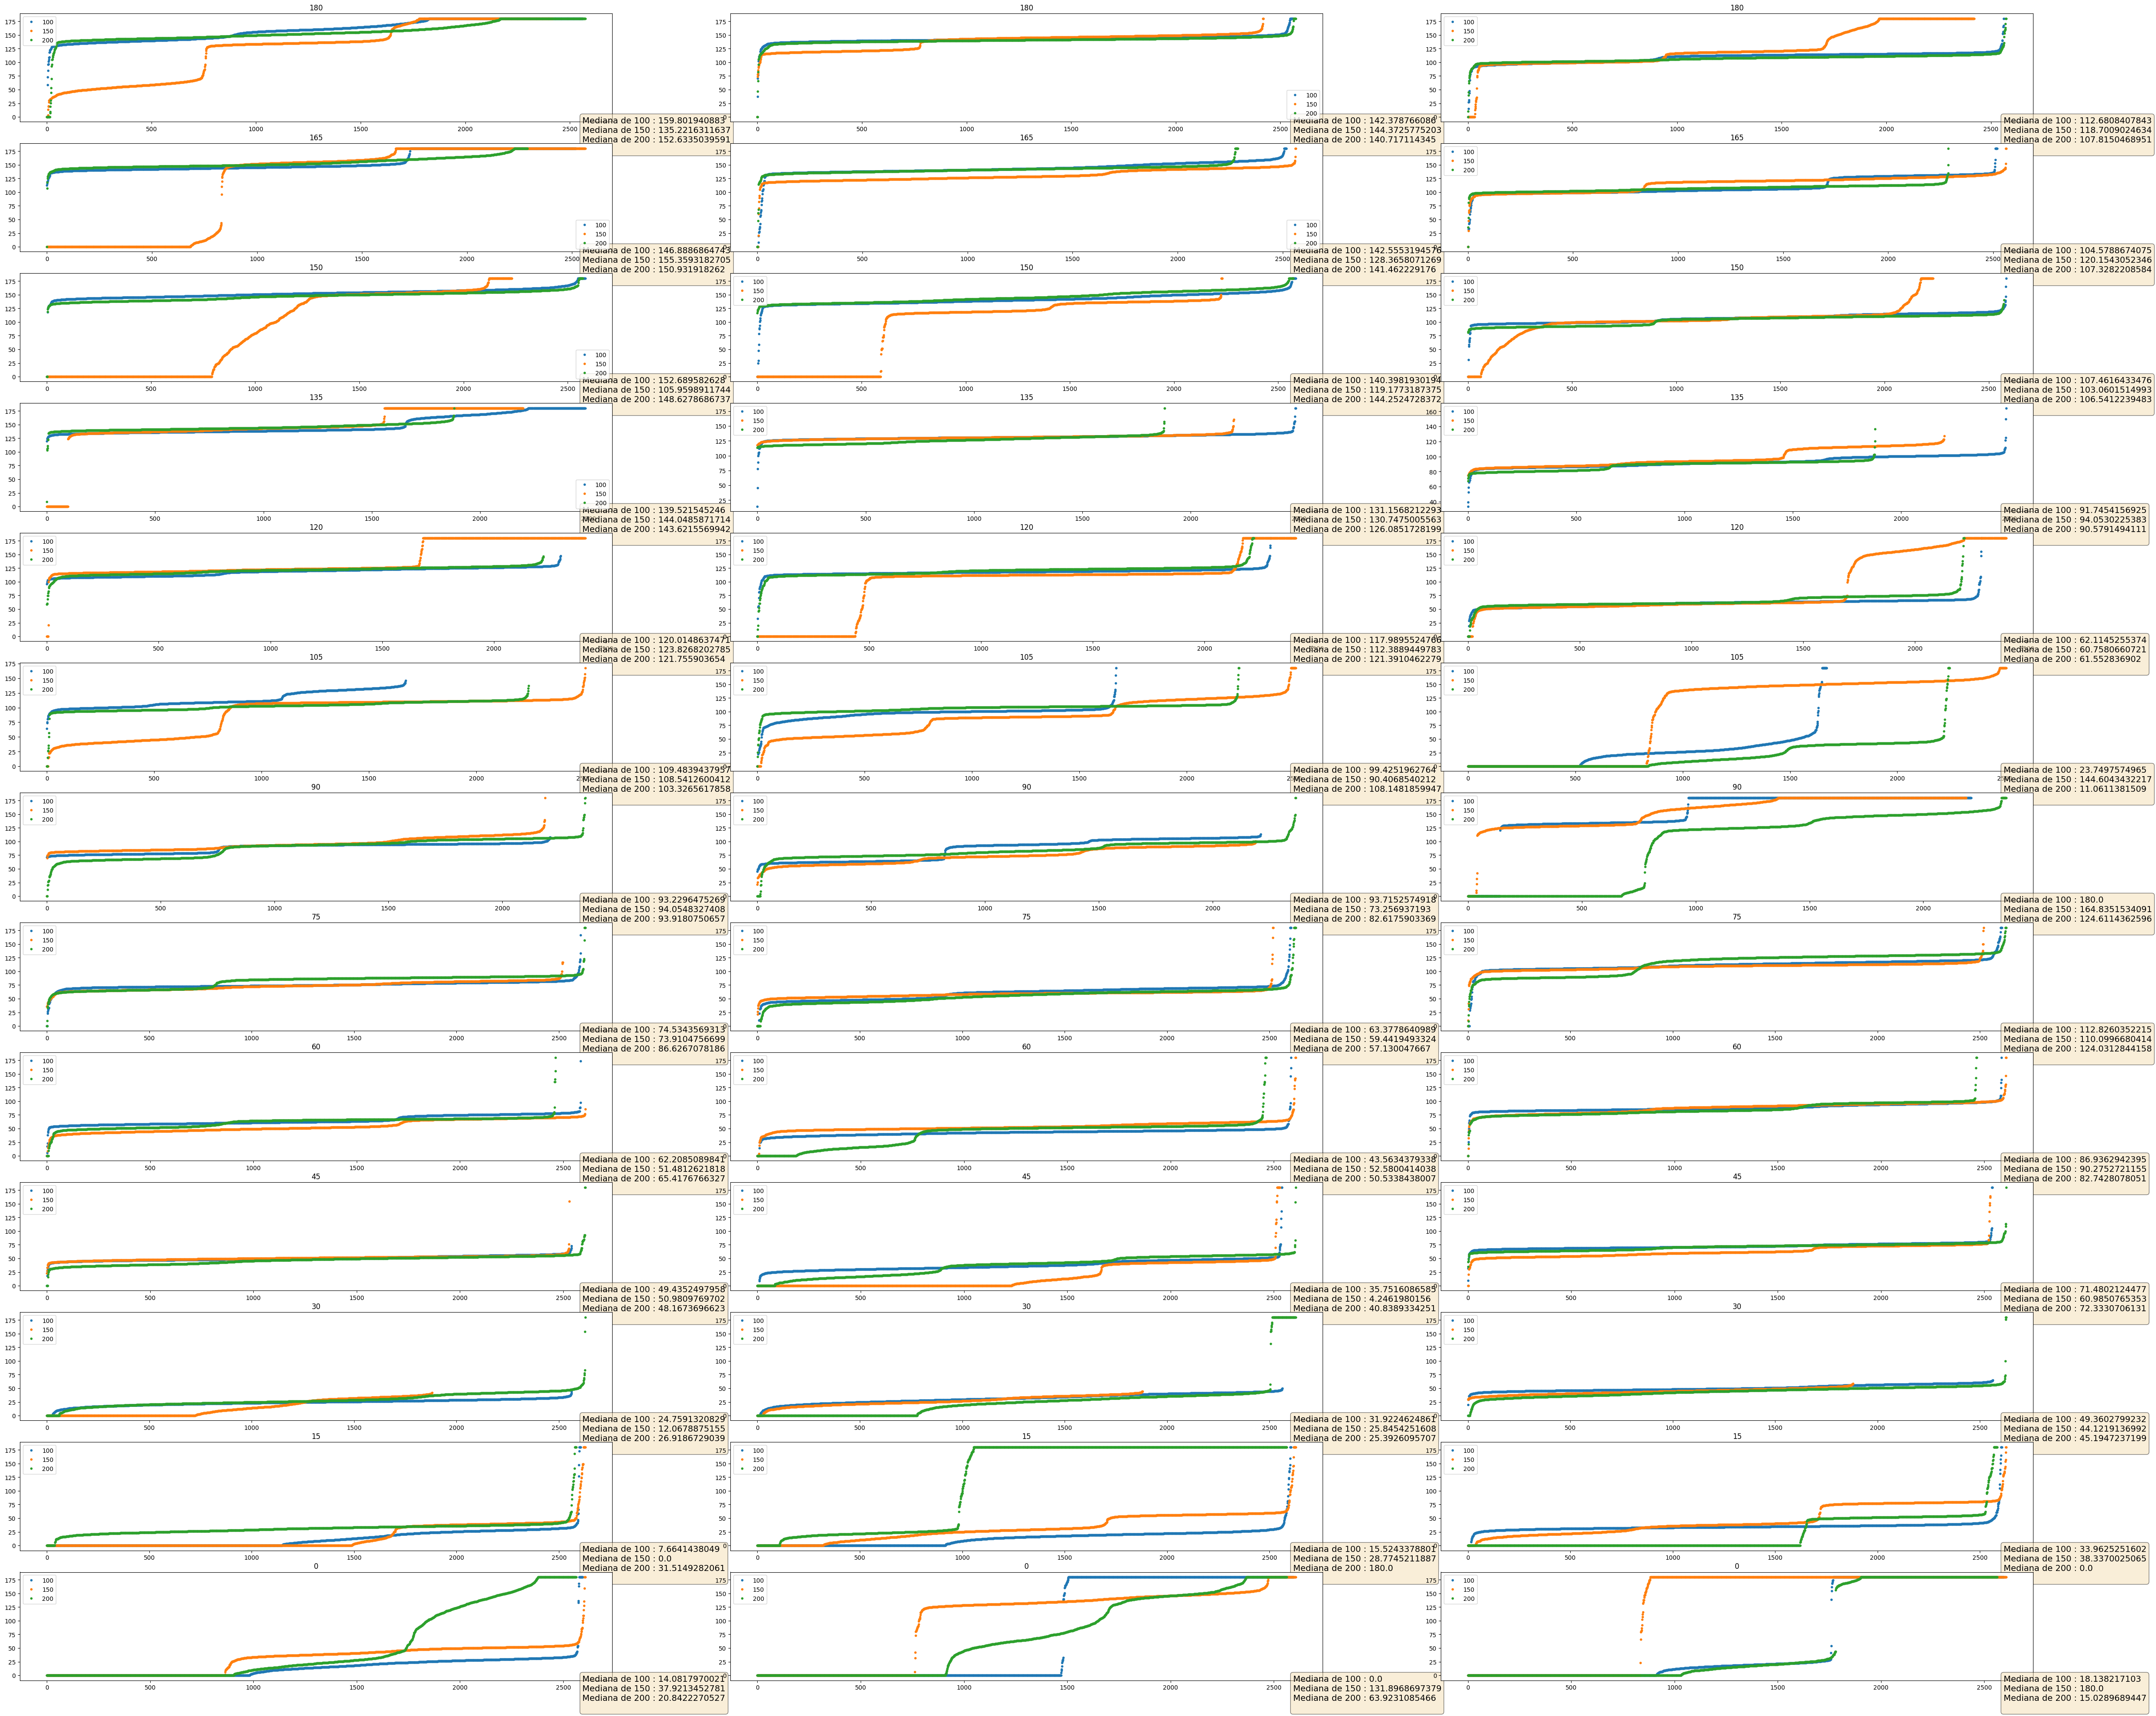

In [18]:
angles = [*range(0,195,15)]
labels = [180,165,150,135,120,105,90,75,60,45,30,15,0]
distances =(100,150,200)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

f, ax = plt.subplots(len(angles), 3,figsize=(60,50))

for index1,angle in enumerate(angles):
    for index2, diff in enumerate(("aoa_12","aoa_32","aoa_31")):
        medianas = ""
        for distance in distances:  
            s = data[data["Distance"] == distance][data["Angle"] == angle]
            pd = []
            for d in s.iterrows():
                pd = [*pd,*d[1]["aoa_minus"][diff]] 
            pd = np.array(pd)
            pd.sort()
            ax[index1][index2].plot(pd,".")
            ax[index1][index2].legend(distances)
            ax[index1][index2].set_title(labels[index1])
            medianas += f"Mediana de {distance} : {pd[len(pd)//2]}\n"

        ax[index1][index2].text(0.95, 0.05,medianas,transform=ax[index1][index2].transAxes, fontsize=14,verticalalignment='top', bbox=props)



C:\Users\pedro\AppData\Local\Temp\ipykernel_11320\2828286437.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  s = data[data["Distance"] == distance][data["Angle"] == angle]


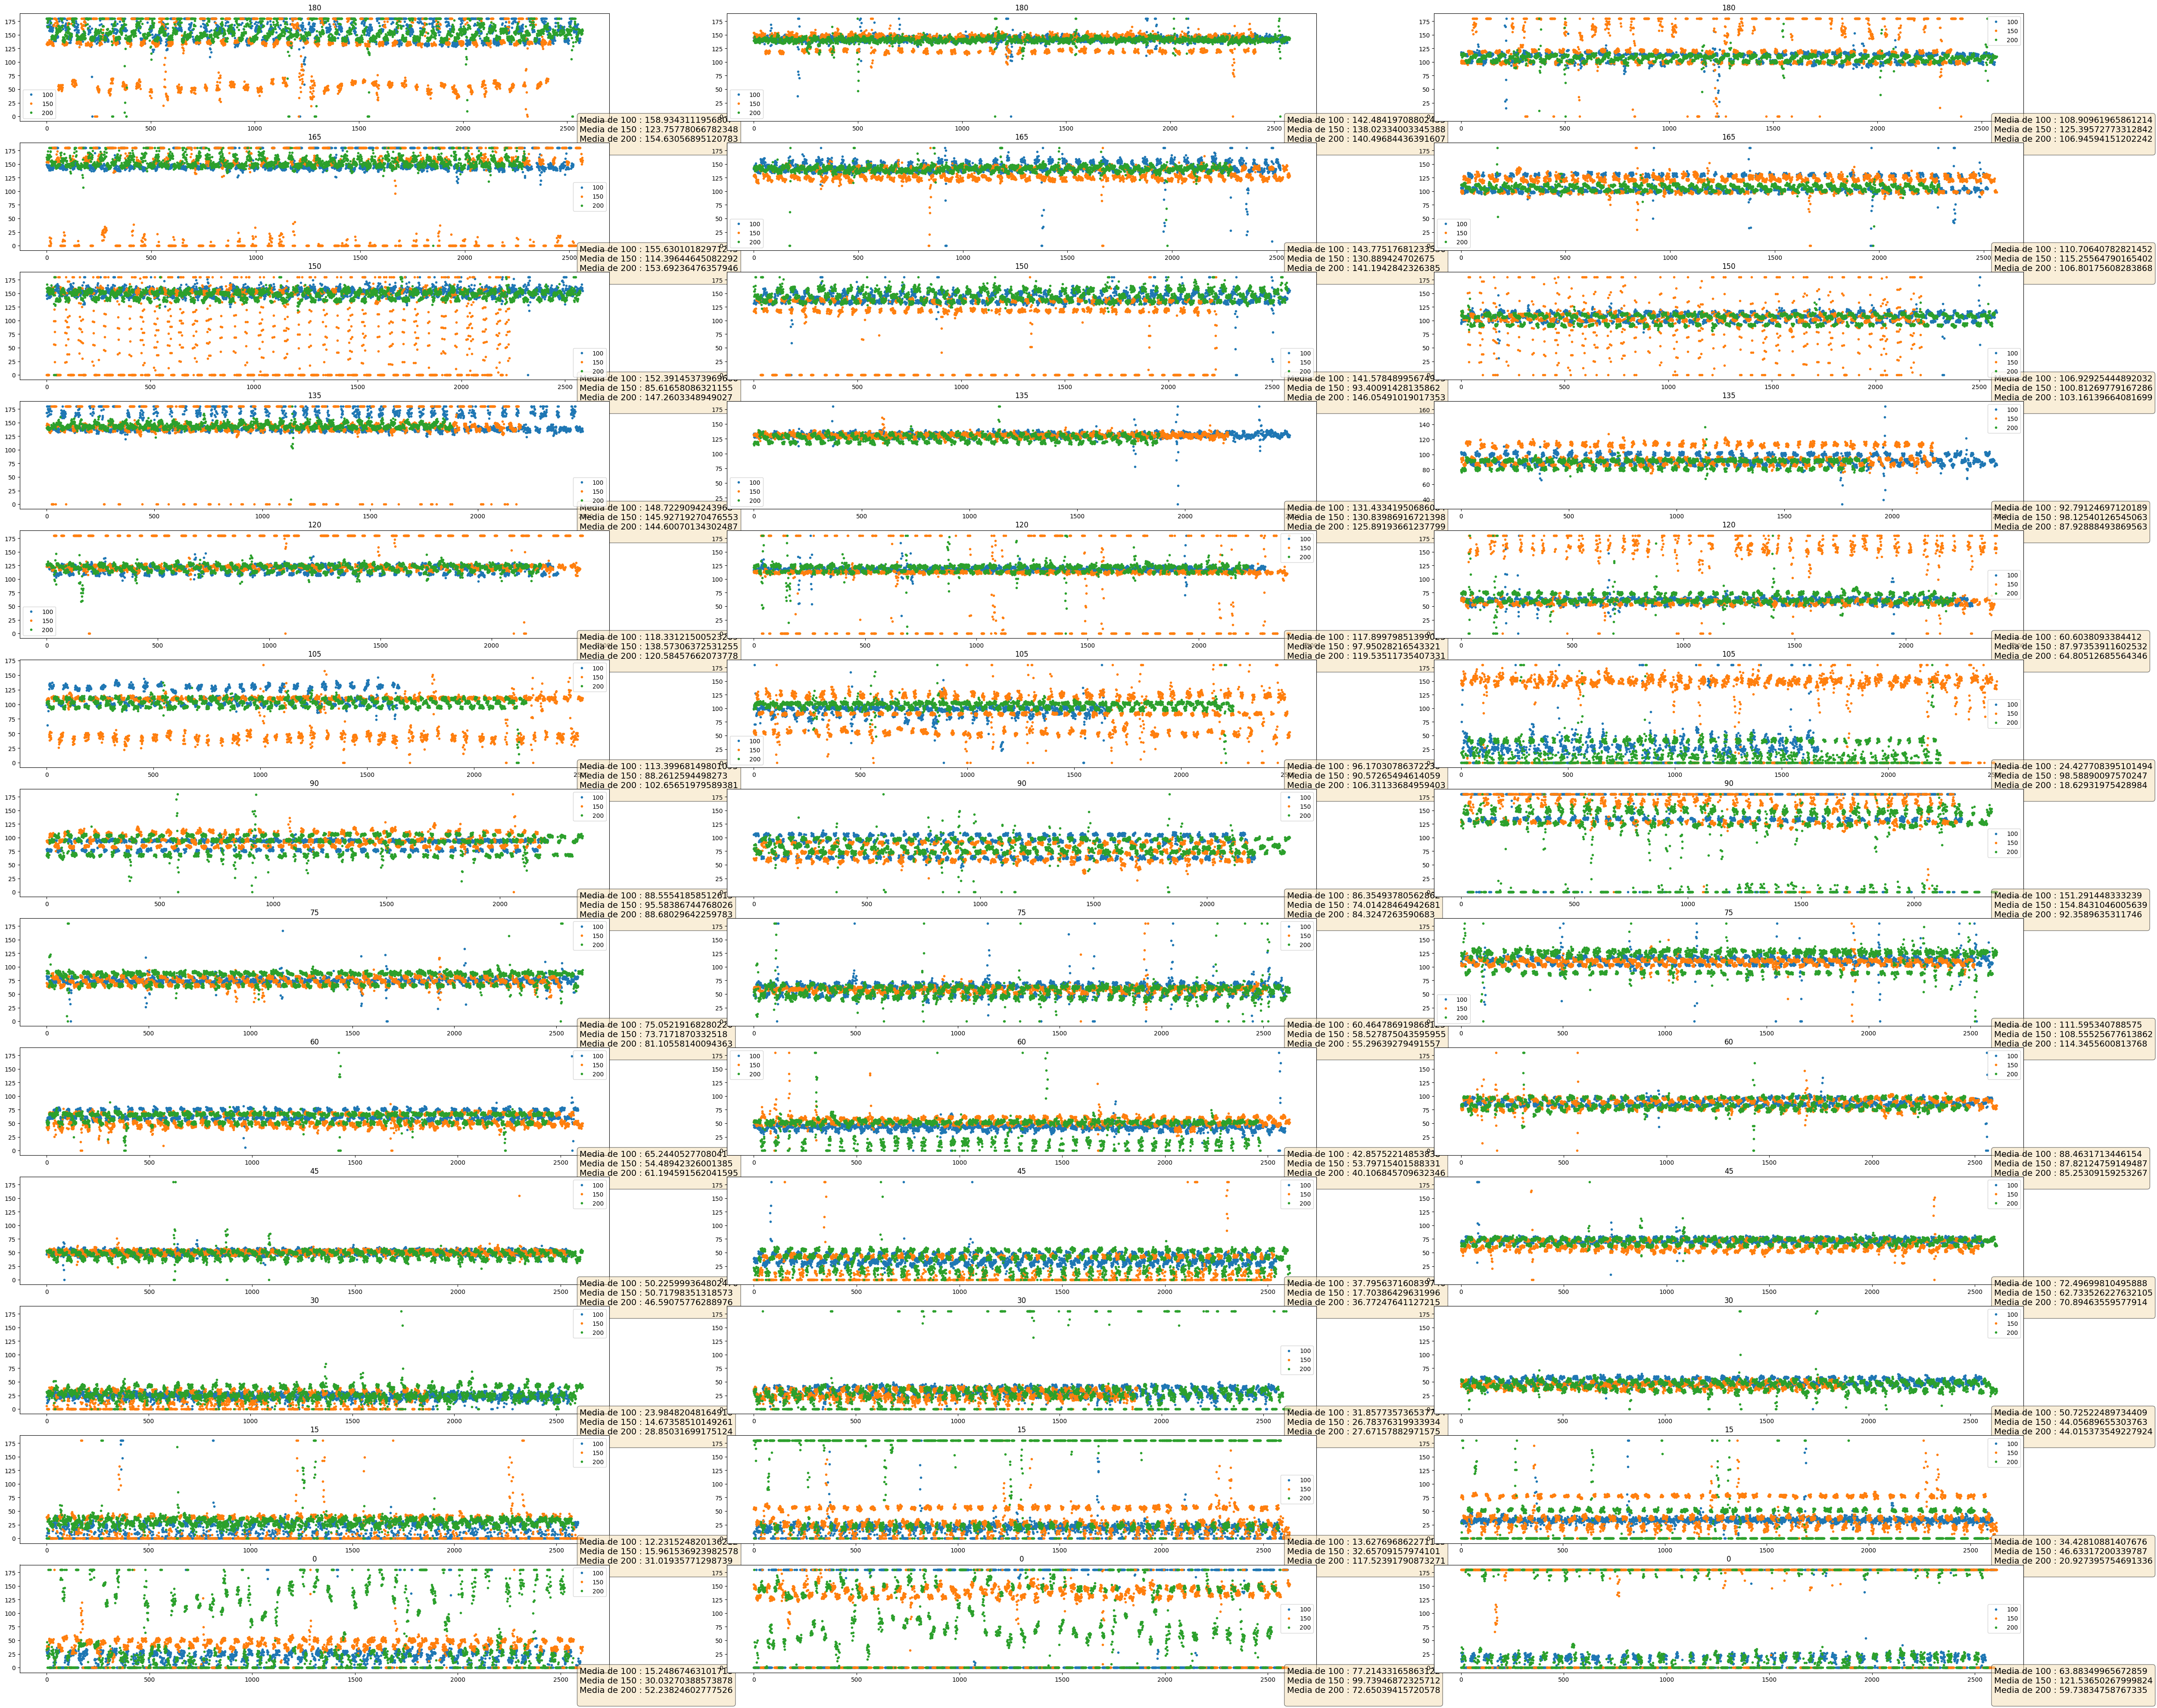

In [22]:
angles = [*range(0,195,15)]
labels = [180,165,150,135,120,105,90,75,60,45,30,15,0]
distances =(100,150,200)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

f, ax = plt.subplots(len(angles), 3,figsize=(60,50))

for index1,angle in enumerate(angles):
    for index2, diff in enumerate(("aoa_12","aoa_32","aoa_31")):
        medianas = ""
        for distance in distances:  
            s = data[data["Distance"] == distance][data["Angle"] == angle]
            pd = []
            for d in s.iterrows():
                pd = [*pd,*d[1]["aoa_minus"][diff]] 
            pd = np.array(pd)
            ax[index1][index2].plot(pd,".")
            ax[index1][index2].legend(distances)
            ax[index1][index2].set_title(labels[index1])
            medianas += f"Media de {distance} : {np.mean(pd)}\n"

        ax[index1][index2].text(0.95, 0.05,medianas,transform=ax[index1][index2].transAxes, fontsize=14,verticalalignment='top', bbox=props)

